In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('conversion_data.csv', header=0)

In [3]:
df.isna().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [4]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

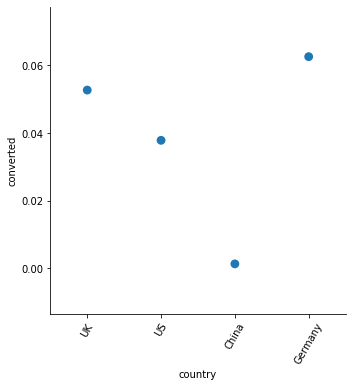

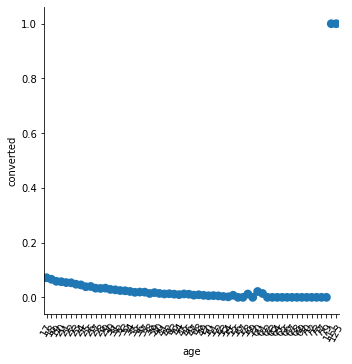

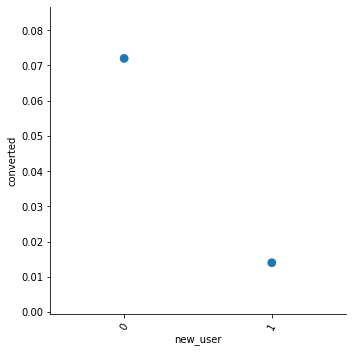

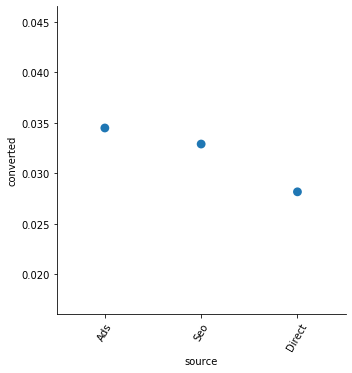

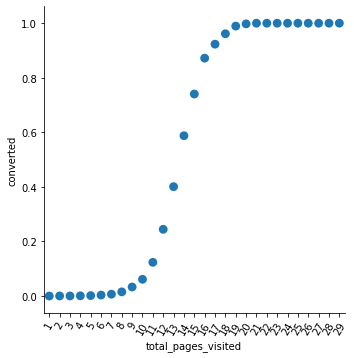

In [6]:
for i in df.columns[:-1]:
    sns.factorplot(x = i, y = 'converted', data = df, ci = None, join = False)
    plt.xticks(rotation = 60)
    plt.show()

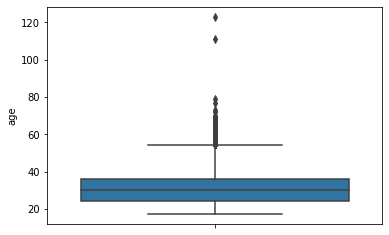

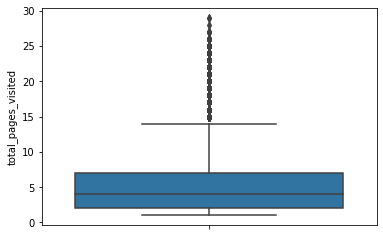

In [19]:
for i in ['age','total_pages_visited']:
    sns.boxplot(y =i, data = df)
    plt.show()

In [7]:
df = df[df.age < 50]

In [20]:
X = df.drop(columns = ['converted'])
Y = df[['converted']]

In [21]:
dummyC = pd.get_dummies(X.country)
dummyS = pd.get_dummies(X.source)

In [22]:
X = pd.concat([X,dummyC,dummyS], axis =1)
X = X.drop(columns=['country','source'])
X

,age,new_user,total_pages_visited,China,Germany,UK,US,Ads,Direct,Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,1,0,1,0
316197,25,0,4,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,1,0,0,1


In [11]:
df.converted.value_counts()

0    299952
1     10167
Name: converted, dtype: int64

In [13]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tashi\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_0          97 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1






In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy = 'minority')

X1, Y1 = ros.fit_resample(X,Y)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 42, stratify = Y1)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, Y_train)

C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [29]:
log.score(X_test,Y_test)

0.9410239954659487

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(log,X_train, Y_train, cv=10).mean()

C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

0.9398986925452718

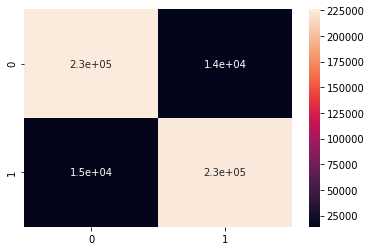

In [31]:
from sklearn import metrics 
y_pred1 = log.predict(X_train)
cm = metrics.confusion_matrix(Y_train, y_pred1)
sns.heatmap(cm, annot=True)

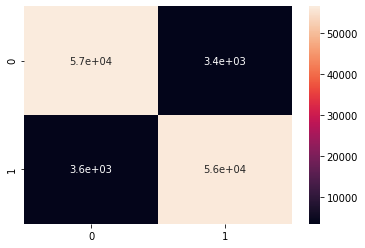

In [32]:
y_pred2 = log.predict(X_test)
cm = metrics.confusion_matrix(Y_test, y_pred2)
sns.heatmap(cm, annot=True)

In [33]:
Y_test['converted'].values.shape

(119981,)

In [34]:
dfpred = pd.DataFrame({'pred':y_pred2,'actual':Y_test['converted'].values})
FN = dfpred.pred[(dfpred.actual == 1) & (dfpred.pred == 0)].count()
TP = dfpred.actual[(dfpred.actual == 1) & (dfpred.pred == 1)].count()
FP = dfpred.actual[(dfpred.actual == 0) & (dfpred.pred == 1)].count()
TN = dfpred.actual[(dfpred.actual == 0) & (dfpred.pred == 0)].count()

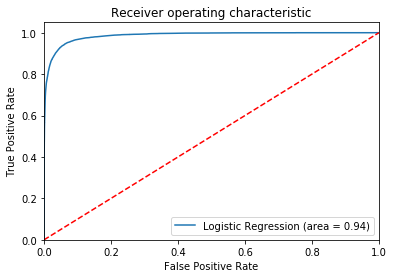

In [35]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1]) 
plt.figure() 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show() 

In [36]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)*100
Recall = TP/(TP+FN)*100
Precision = TP/(TP + FP)*100
print("Le taux d'Accuracy du modèle est de {}% (le pourcentage de nos predictions qui se sont avéré correctes)".format(round(Accuracy,2)))
print("Le taux de Recall du modèle est de {}% (le pourcentage de réelles valeurs 1 que nous avons pu prédire)".format(round(Recall,2)))
print("Le taux de Precision du modèle est de {}% (le pourcentage de prediction 1 qui sont correctes)".format(round(Precision,2)))

Le taux d'Accuracy du modèle est de 94.1% (le pourcentage de nos predictions qui se sont avéré correctes)
Le taux de Recall du modèle est de 93.92% (le pourcentage de réelles valeurs 1 que nous avons pu prédire)
Le taux de Precision du modèle est de 94.27% (le pourcentage de prediction 1 qui sont correctes)


Notre modèle prédit beaucoup mieux les 0 que les 1 car les valeurs nuls dominent largement le dataset.

In [40]:
round(df.converted.value_counts()/df.converted.count()*100,2)

0    96.72
1     3.28
Name: converted, dtype: float64

In [39]:
round(Y1.converted.value_counts()/Y1.converted.count()*100,2)

1    50.0
0    50.0
Name: converted, dtype: float64